In [40]:
import pandas as pd
import numpy as np
import umap
import ast
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [41]:
df = pd.read_csv('../Severstal/train_embeddings.csv', index_col=0)
X = df['embedding'].apply(lambda x: ast.literal_eval(x))

In [42]:
X = X.to_list()

In [43]:
X = np.array(X)
y = df['class_id'].to_list()
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [44]:
umap_reducer = umap.UMAP(n_neighbors=5, min_dist=0.5, n_components=2, random_state=42)
# Fit and transform the data
X_umap = umap_reducer.fit_transform(X)

/home/eas/miniconda3/envs/clipseg/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


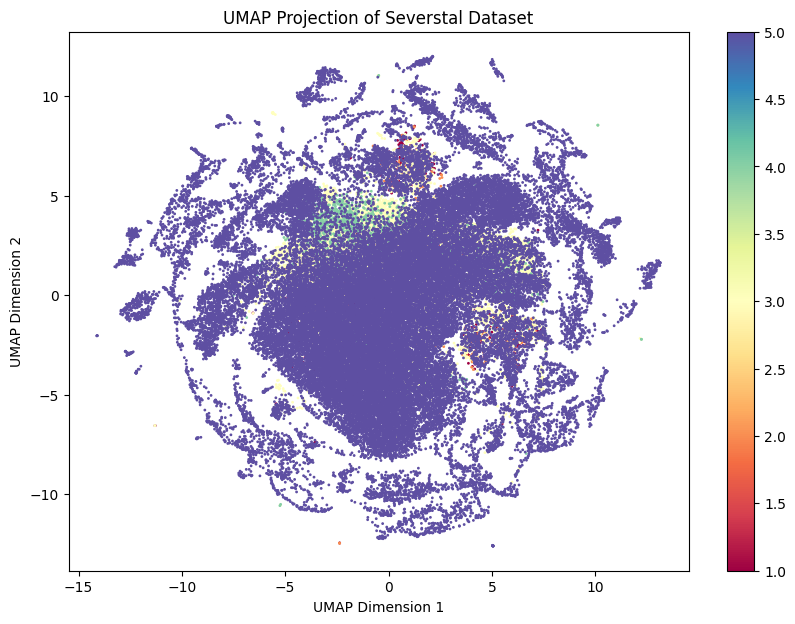

In [45]:
plt.figure(figsize=(10, 7))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', s=1)
plt.colorbar()
plt.title('UMAP Projection of Severstal Dataset')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()